# Download and plot time-series data on COVID-19 cases 

Johns Hopkins (a university that does a lot of medical research) makes a dataset available on COVID-19 cases, and they update it every day. 

They put it online in [this GitHub repository](https://github.com/CSSEGISandData/COVID-19). So, we can download the current data at any time and plot the number of COVID-19 cases in any part of the world, as a function of date.

Let's do that.

If you get bored with the barplots, there are some lineplots comparing different parts of the world at the bottom.

In [2]:
# import a bunch of stuff

# this is for plotting
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

# this is for dealing with data
import pandas as pd

# this is for downloading the dataset
import requests

# this is for treating the downloaded dataset like a file
from io import StringIO

In [3]:
# Here's the direct URL for the dataset I want
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
# Download the dataset
r = requests.get(url)

# Trick Pandas into thinking the downloaded dataset, which is a binary-formatted 
# string, is a file. Then load the dataset into Pandas.
response_as_file = StringIO(r.content.decode("utf-8"))
df_timeseries = pd.read_csv(response_as_file)

In [4]:
# show the first 10 rows of the dataset
df_timeseries[:10]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,989,989,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,400,410,410,411,413,414,414,418,418,422
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,294,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,102,119
5,Guangdong,Mainland China,23.3417,113.4244,26,32,53,78,111,151,...,1347,1347,1348,1349,1349,1350,1350,1350,1351,1352
6,Guangxi,Mainland China,23.8298,108.7881,2,5,23,23,36,46,...,252,252,252,252,252,252,252,252,252,252
7,Guizhou,Mainland China,26.8154,106.8748,1,3,3,4,5,7,...,146,146,146,146,146,146,146,146,146,146
8,Hainan,Mainland China,19.1959,109.7453,4,5,8,19,22,33,...,168,168,168,168,168,168,168,168,168,168
9,Hebei,Mainland China,38.0428,114.5149,1,1,2,8,13,18,...,312,317,318,318,318,318,318,318,318,318


In [5]:
# Let's see what Country/Region values we can find data for
df_timeseries["Country/Region"].value_counts()

US                        60
Mainland China            31
Australia                  8
Canada                     5
Bahrain                    1
Poland                     1
Ireland                    1
Hungary                    1
Thailand                   1
Iraq                       1
Israel                     1
Estonia                    1
Algeria                    1
Saint Barthelemy           1
Luxembourg                 1
Taiwan                     1
Philippines                1
Jordan                     1
United Arab Emirates       1
Nepal                      1
Romania                    1
Norway                     1
Georgia                    1
Sri Lanka                  1
Palestine                  1
Vatican City               1
Serbia                     1
Iceland                    1
Ukraine                    1
Azerbaijan                 1
                          ..
Colombia                   1
Kuwait                     1
Faroe Islands              1
Cambodia      

In [4]:
# Each row in the dataset (shown above) is a count of cases in a geographic region.

# For the data to display, we want the columns with dates as names. Those are our counts of 
# cases in each geographic region.
# Counting from 0, the indexes of the columns that we want are the ones with index 4
# (1/22/20) and higher.
date_columns = df_timeseries.columns[4:]

def plot_casecount_by_date(df, title):
    """
    Make a barplot of the case counts by date, for a dataset containing all the rows
    from a region of interest
    """
    sums = [df[column].sum() for column in date_columns]
    f, ax = plt.subplots()
    matplotlib.pyplot.xticks(rotation=90)
    ax.set_title(title)
    sns.barplot(x=date_columns, y=sums, ax=ax)
    f.set_size_inches(14,6)

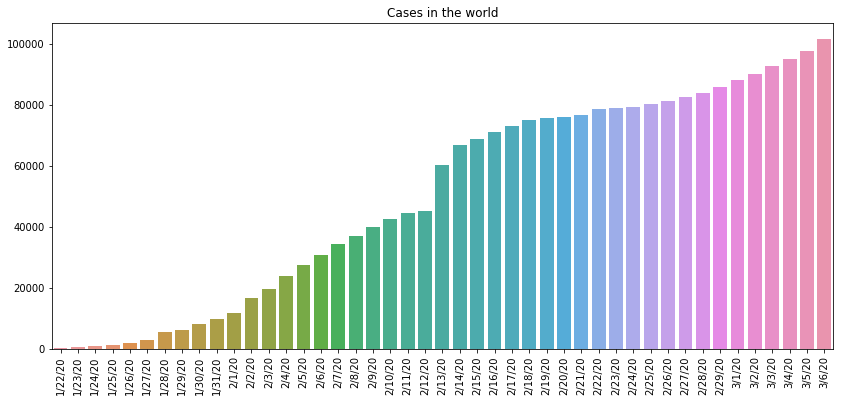

In [5]:
# to plot all the cases in the world, send our function the entire dataset
plot_casecount_by_date(df_timeseries, "Cases in the world")

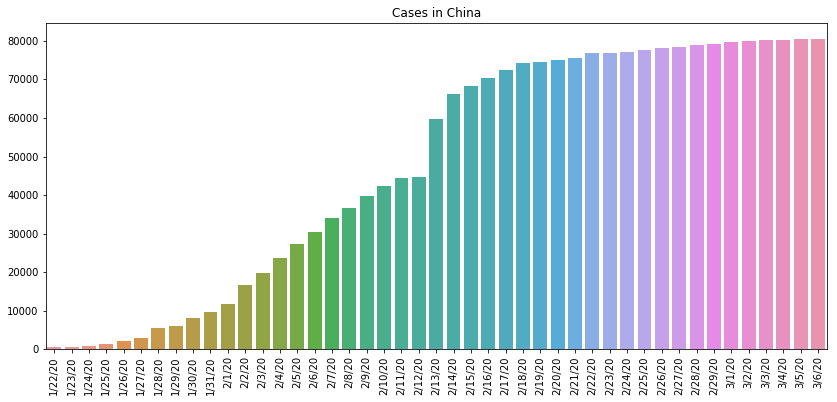

In [6]:
# to plot the cases in China, give our function all the rows 
# where Country/Region is Mainland China
df_china = df_timeseries[df_timeseries['Country/Region'] == 'Mainland China']
plot_casecount_by_date(df_china, "Cases in China")

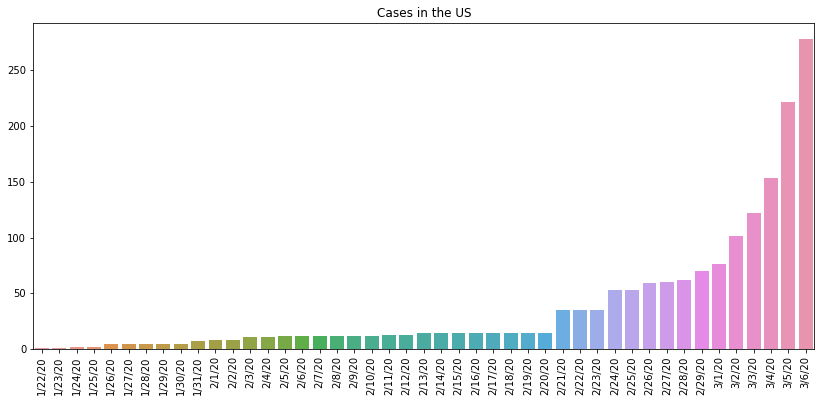

In [7]:
df_US = df_timeseries[df_timeseries['Country/Region'] == 'US']
plot_casecount_by_date(df_US, "Cases in the US")

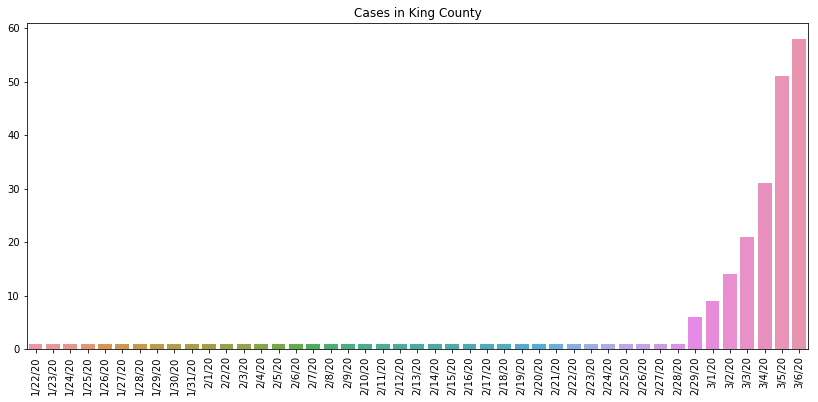

In [8]:
df_kingcounty = df_timeseries[df_timeseries['Province/State'] == 'King County, WA']
plot_casecount_by_date(df_kingcounty, "Cases in King County")

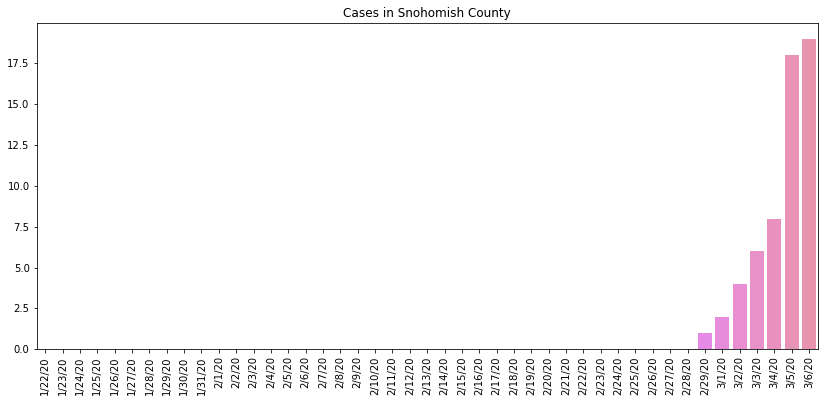

In [20]:
df_snohomishcounty = df_timeseries[df_timeseries['Province/State'] == 'Snohomish County, WA']
plot_casecount_by_date(df_snohomishcounty, "Cases in Snohomish County")


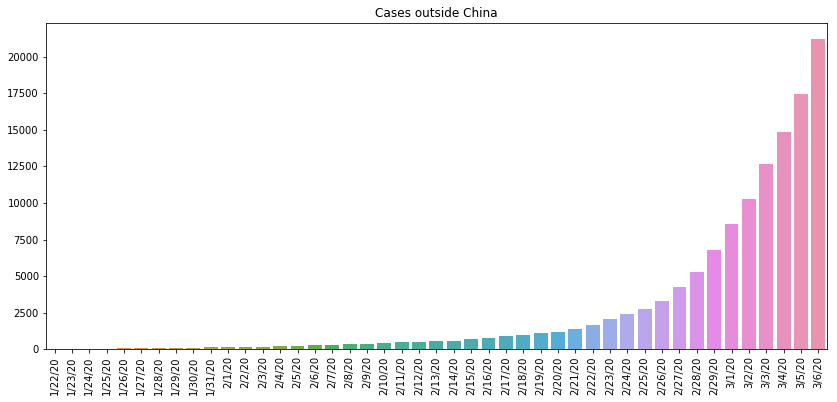

In [9]:
# to plot the cases in China, give our function all the rows 
# where Country/Region is Mainland China
df_notchina = df_timeseries[df_timeseries['Country/Region'] != 'Mainland China']
plot_casecount_by_date(df_notchina, "Cases outside China")

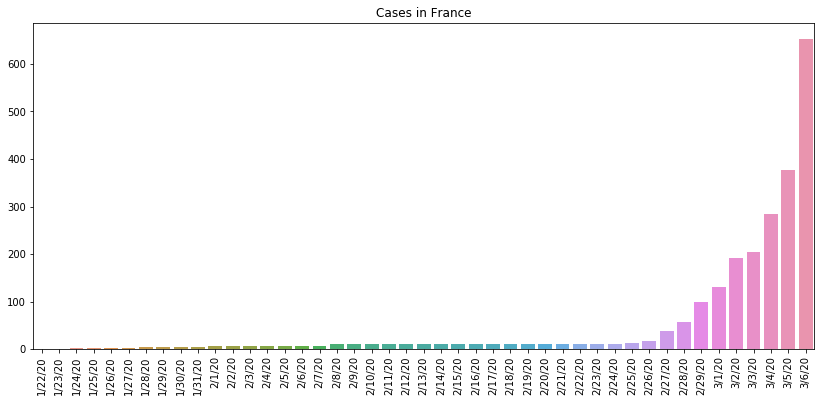

In [10]:
df_france = df_timeseries[df_timeseries['Country/Region'] == 'France']
plot_casecount_by_date(df_france, "Cases in France")

In [11]:
def lineplot_casecounts_by_date(dfs, labels):
    """
    Make a line plot of cases by date, with multiple lines for multiple dataframes
    """
    f, ax = plt.subplots()
    matplotlib.pyplot.xticks(rotation=90)
    
    for i in range(len(dfs)):
        df = dfs[i]
        label = labels[i]
        sums = [df[column].sum() for column in date_columns]
        sns.lineplot(x=range(len(date_columns)), y=sums, ax=ax, label=label)
    f.set_size_inches(14,6)

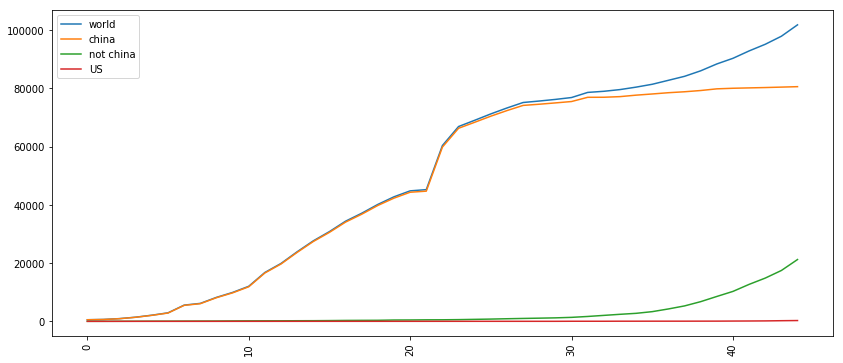

In [12]:
lineplot_casecounts_by_date([df_timeseries, df_china, df_notchina, df_US],
                            ['world', 'china', 'not china', 'US'])

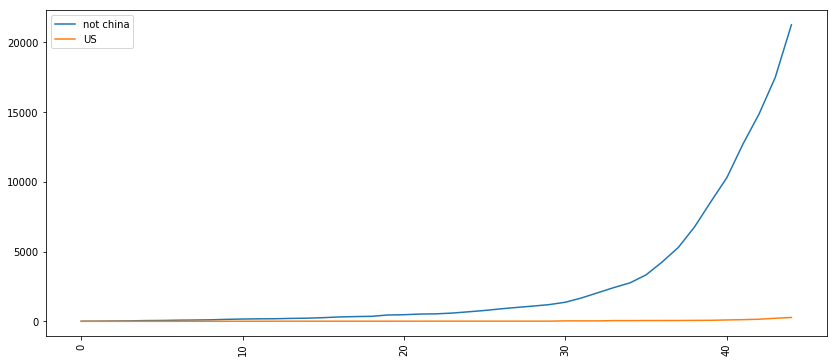

In [13]:
lineplot_casecounts_by_date([df_notchina, df_US],
                            ['not china', 'US'])

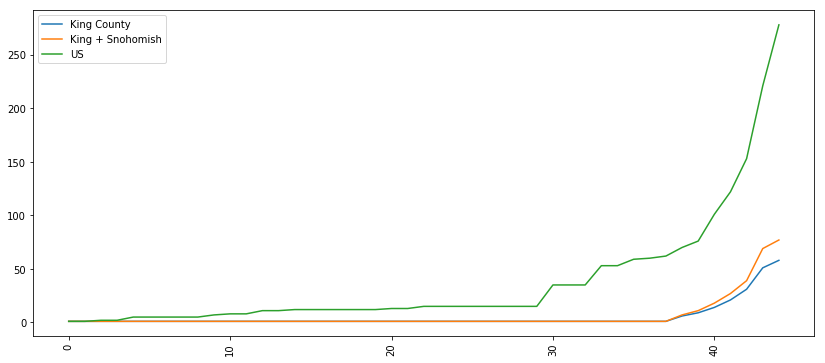

In [18]:
df_kingandsnohomish = df_timeseries[df_timeseries['Province/State'].isin(['Snohomish County, WA',
                                                                          'King County, WA'])]

lineplot_casecounts_by_date([df_kingcounty, df_kingandsnohomish, df_US],
                            ['King County', 'King + Snohomish', 'US'])
